In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
train = pd.read_csv('p2-data/train.csv')

In [5]:
test = pd.read_csv('p2-data/test.csv')

In [6]:
train

,2010 Census Population,City,Land Area,Households with Under 18,Population Density,Total Families,Total Pawdacity Sales
0,4585,Buffalo,3115.507500,746,1.55,1819.50,185328
1,35316,Casper,3894.309100,7788,11.16,8756.32,317736
2,59466,Cheyenne,1500.178400,7158,20.34,14612.64,917892
3,9520,Cody,2998.956960,1403,1.82,3515.62,218376
4,6120,Douglas,1829.465100,832,1.46,1744.08,208008
5,12359,Evanston,999.497100,1486,4.95,2712.64,283824
6,6314,Powell,2673.574550,1251,1.62,3134.18,233928
7,10615,Riverton,4796.859815,2680,2.34,5556.49,303264
8,23036,Rock Springs,6620.201916,4022,2.78,7572.18,253584
9,17444,Sheridan,1893.977048,2646,8.98,6039.71,308232


In [7]:
test.head()

,2014 Estimate,City,Land Area,Households with Under 18,Population Density,Total Families
0,1968,Afton,853.806650,497,0.93,1040.41
1,185,Albin,7.685902,37,0.10,74.87
2,845,Alpine,366.598892,213,0.40,446.72
3,439,Baggs,253.240322,62,0.06,129.53
4,107,Bairoil,29.459830,18,0.01,33.70


In [39]:
def scatter_plot(df, cols):
    for col in cols:
        sns.regplot(x= df[col], y=df['Total Pawdacity Sales'])
        

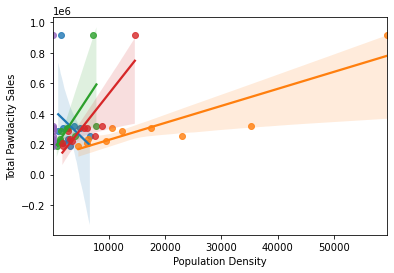

In [40]:
scatter_plot(train, ['Land Area', '2010 Census Population', 'Households with Under 18', 'Total Families', 'Population Density'])

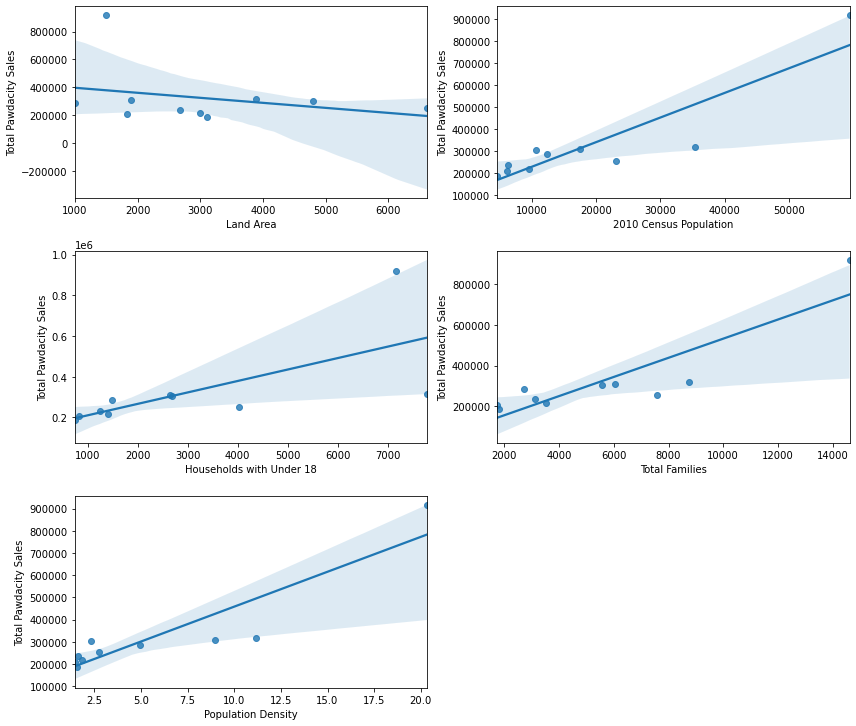

In [45]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(321)
fig.tight_layout()
sns.regplot(x=train['Land Area'], y=train['Total Pawdacity Sales'], ax=ax1)


ax2 = fig.add_subplot(322)
fig.tight_layout()
sns.regplot(x=train['2010 Census Population'], y=train['Total Pawdacity Sales'], ax=ax2)


ax3 = fig.add_subplot(323)
fig.tight_layout()
sns.regplot(x=train['Households with Under 18'], y=train['Total Pawdacity Sales'], ax=ax3)

ax4 = fig.add_subplot(324)
fig.tight_layout()
sns.regplot(x=train['Total Families'], y=train['Total Pawdacity Sales'], ax=ax4)

ax5 = fig.add_subplot(325)
fig.tight_layout()
sns.regplot(x=train['Population Density'], y=train['Total Pawdacity Sales'], ax=ax5)


plt.savefig("AvgSales", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)
plt.show()

In [54]:
y = train['Total Pawdacity Sales']
X = train[['Land Area', 'Total Families', 'Population Density']]

In [55]:
# Add constant to the X
X = sm.add_constant(X)

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [56]:
model = sm.OLS(y, X).fit()

In [57]:
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Total Pawdacity Sales   R-squared:                       0.945
Model:                               OLS   Adj. R-squared:                  0.918
Method:                    Least Squares   F-statistic:                     34.67
Date:                   Fri, 30 Apr 2021   Prob (F-statistic):           0.000348
Time:                           03:38:56   Log-Likelihood:                -121.85
No. Observations:                     10   AIC:                             251.7
Df Residuals:                          6   BIC:                             252.9
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [70]:
X_test = test

In [71]:
X_test =X_test[['Land Area', 'Total Families', 'Population Density']]

In [72]:
X_test= sm.add_constant(X_test)

In [73]:
predicted_price = model.predict(X_test)

In [74]:
test['Predicted Sales'] = round(predicted_price, 2)

In [75]:
test[(test['2014 Estimate'] > 4000) & (test['Predicted Sales'] >200000) & (test['Predicted Sales']<500000)]

,2014 Estimate,City,Land Area,Households with Under 18,Population Density,Total Families,Predicted Sales
1,40086,Casper,3894.309100,7788,11.16,8756.32,364014.02
3,9740,Cody,2998.956960,1403,1.82,3515.62,259919.46
4,6423,Douglas,1829.465100,832,1.46,1744.08,214103.94
5,12190,Evanston,999.497100,1486,4.95,2712.64,272436.62
7,12630,Green River,3477.361206,2113,1.46,3977.40,270227.71
8,10449,Jackson,1757.659200,1078,2.36,2313.08,246690.55
9,7642,Lander,3346.809340,1870,1.63,3876.81,267426.25
10,32081,Laramie,2513.745235,2075,5.19,4668.93,305878.63
11,6407,Powell,2673.574550,1251,1.62,3134.18,261899.26
13,10953,Riverton,4796.859815,2680,2.34,5556.49,262996.91
